### 1. Importing the required libraries for EDA
Below are the libraries that are used in order to perform EDA (Exploratory data analysis)

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

### 2. Loading the data into the data frame
We first make a connection to the database and then use pandas to query from that database into a dataframe

In [2]:
conn = sqlite3.connect('data/calls.db')
df = pd.read_sql_query("SELECT * FROM calls", conn)

df.head()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
0,947429,-719,12,42.130000,Suspicious,Yes,1,95,Voip,2023-07-23 09:04:00,Fully Charged,Scam
1,540498,116,3,29.900000,Unlikely,Yes,0,91,Mobile,2023-09-05 20:11:00,Fully Charged,Scam
2,434243,29,16,723.460000,Very Suspicious,Yes,2,91,Voip,2023-12-16 11:03:00,Charging,Scam
3,903537,-563,4,64.287478,Unlikely,Yes,3,91,Telegram,2023-02-25 10:41:00,Fully Charged,Not Scam
4,969179,312,19,0.000000,Unlikely,Yes,0,91,Telegram,2023-11-10 15:53:00,Fully Charged,Scam


In [3]:
df.tail()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
11995,496033,116,15,NaN,Unlikely,Yes,4,7,Voip,2023-05-03 14:32:00,Fully Charged,Not Scam
11996,730960,621,3,11.74,Suspicious,Yes,0,MM,Landline,2023-08-04 00:16:00,Fully Charged,Scam
11997,806410,-27,4,102.45,Suspicious,Yes,0,MM,Voip,2024-03-22 01:31:00,Not Charging,Scam
11998,481032,-127,9,NaN,Unlikely,Yes,0,1,Landline,2023-07-11 17:04:00,Charging,Not Scam
11999,507774,505,4,0.00,Unlikely,Yes,5,44,Telegram,2024-02-13 00:33:00,Charging,Not Scam


### 3. Checking the types of data
Here we check the datatypes because sometimes integer values, like in call duration or financial loss, would be stored as a string. If in that case, we have to convert that string to the integer data, only then we can plot the data via a graph.

In [4]:
df.dtypes

ID                          int64
Call Duration               int64
Call Frequency              int64
Financial Loss            float64
Flagged by Carrier         object
Is International           object
Previous Contact Count      int64
Country Prefix             object
Call Type                  object
Timestamp                  object
Device Battery             object
Scam Call                  object
dtype: object

### 4. Dropping irrelevant columns
Sometimes there would be columns that we never use in such cases dropping is the only solution. In this case, I found the columns Device Battery and Timestamp not useful so I just dropped that for this instance.

In [5]:
df = df.drop(['Device Battery', 'Timestamp'], axis=1)
df.head()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Scam Call
0,947429,-719,12,42.130000,Suspicious,Yes,1,95,Voip,Scam
1,540498,116,3,29.900000,Unlikely,Yes,0,91,Mobile,Scam
2,434243,29,16,723.460000,Very Suspicious,Yes,2,91,Voip,Scam
3,903537,-563,4,64.287478,Unlikely,Yes,3,91,Telegram,Not Scam
4,969179,312,19,0.000000,Unlikely,Yes,0,91,Telegram,Scam


### 5. Dropping the duplicate rows
This can sometimes occur due to data entry errors, leading to redundant information. Hence the need to check for duplicates and remove them if any. In this case, we found 2000 duplicated rows and after removing them, we are left with 10000 rows.

In [6]:
df.shape

(12000, 10)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (2000, 10)


In [8]:
df.count()

ID                        12000
Call Duration             12000
Call Frequency            12000
Financial Loss            10597
Flagged by Carrier        12000
Is International          12000
Previous Contact Count    12000
Country Prefix            12000
Call Type                 12000
Scam Call                 12000
dtype: int64

In [9]:
df = df.drop_duplicates()
df.head()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Scam Call
0,947429,-719,12,42.130000,Suspicious,Yes,1,95,Voip,Scam
1,540498,116,3,29.900000,Unlikely,Yes,0,91,Mobile,Scam
2,434243,29,16,723.460000,Very Suspicious,Yes,2,91,Voip,Scam
3,903537,-563,4,64.287478,Unlikely,Yes,3,91,Telegram,Not Scam
4,969179,312,19,0.000000,Unlikely,Yes,0,91,Telegram,Scam


In [10]:
df.count()

ID                        10000
Call Duration             10000
Call Frequency            10000
Financial Loss             8865
Flagged by Carrier        10000
Is International          10000
Previous Contact Count    10000
Country Prefix            10000
Call Type                 10000
Scam Call                 10000
dtype: int64

### 6. Replacing missing values with mean
The missing values in Financial Loss has a significant percentage of about 11.3%, hence the best way to handle this is to replace the missing values with either the average, mode or median. In this case we shall replace the missing values with just the average.

In [11]:
df.isnull().sum()

ID                           0
Call Duration                0
Call Frequency               0
Financial Loss            1135
Flagged by Carrier           0
Is International             0
Previous Contact Count       0
Country Prefix               0
Call Type                    0
Scam Call                    0
dtype: int64

In [12]:
df['Financial Loss'].fillna(df['Financial Loss'].mean(), inplace=True)

In [13]:
df.isnull().sum()

ID                        0
Call Duration             0
Call Frequency            0
Financial Loss            0
Flagged by Carrier        0
Is International          0
Previous Contact Count    0
Country Prefix            0
Call Type                 0
Scam Call                 0
dtype: int64

### 7. Dropping negative values
Some negative values are present in Call Duration and Financial Loss. This may happen due to error in data entry but I do not expect negative values to be present in features like Call Duration and Financial Loss, hence I dropped them for this instance.

In [14]:
df.describe()

,ID,Call Duration,Call Frequency,Financial Loss,Previous Contact Count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,549171.604600,112.394100,10.653800,98.497338,1.855000
std,258983.069885,284.370395,5.841212,182.971058,1.769545
min,100017.000000,-787.000000,2.000000,-896.400000,0.000000
25%,328241.750000,9.000000,6.000000,0.000000,0.000000
50%,542268.500000,47.000000,9.000000,30.880723,1.000000
75%,777904.500000,288.000000,15.000000,98.497338,3.000000
max,999709.000000,822.000000,27.000000,1055.440000,8.000000


In [15]:
df.shape

(10000, 10)

In [16]:
df = df[(df[['Call Duration', 'Financial Loss']] >= 0).all(axis=1)]

In [17]:
df.shape

(7334, 10)

### 8. Checking Category Uniqueness
We check for category uniqueness because sometimes two or more categories can actually be the same. If so, we combine the categories to avoid misrepresentation of the data. In this case, columns Country Prefix and Call Type each have two categories which are in fact the same but are just spelt or represented differently.

- In Country Prefix, there is a category MM which does not fit the rest of the categories but turns out that is the country code for Myanmar. It just so happens that the Maynmar dialing code is 95, which is one of the categories.

- In Call Type, WhatsApp and Whats App represent 2 different categories when they should be 1

In [18]:
df['Country Prefix'].unique()

array(['91', '65', '95', '1', '44', 'MM', '7'], dtype=object)

In [19]:
df['Call Type'].unique()

array(['Mobile', 'Voip', 'Telegram', 'Landline', 'Whats App', 'WhatsApp'],
      dtype=object)

In [20]:
df['Country Prefix'] = df['Country Prefix'].replace('MM', '95')
df['Call Type'] = df['Call Type'].replace('Whats App', 'WhatsApp')

In [21]:
df['Country Prefix'].unique()

array(['91', '65', '95', '1', '44', '7'], dtype=object)

In [22]:
df['Call Type'].unique()

array(['Mobile', 'Voip', 'Telegram', 'Landline', 'WhatsApp'], dtype=object)

### 9. Plotting histograms, distribution graphs and pairplots

#### Histograms and Distribution graphs
Also known as univariate analysis, we examine each feature and look into the distributions, patterns, and characteristics before exploring relationships with other variables

In [23]:
num_cols = ['Call Duration', 'Call Frequency', 'Financial Loss', 'Previous Contact Count']
cat_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Scam Call']

def plot_num(num_cols):
    for col in num_cols:
        df[col].plot(kind='kde', title=col)
        plt.show()
        
def plot_cat(cat_cols):
    for col in cat_cols:
        ax = df[col].value_counts().plot(kind='bar', title=col)
        ax.set_ylabel('Count')
        plt.show()

Numerical features are observed to generally have a right skewed distribution

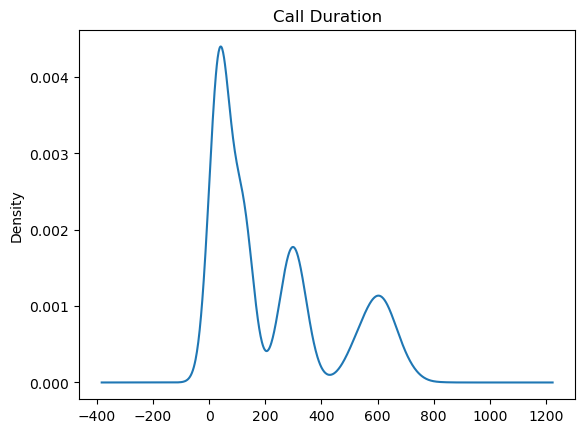

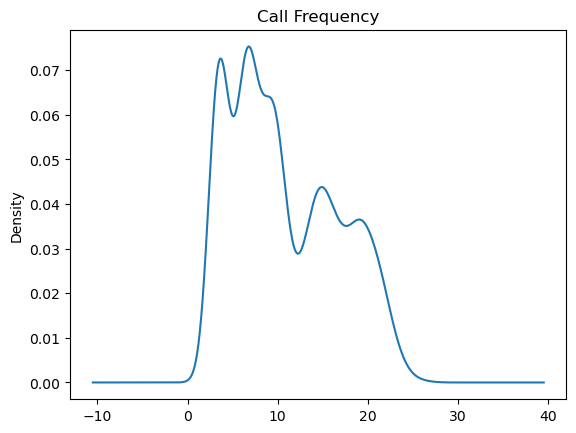

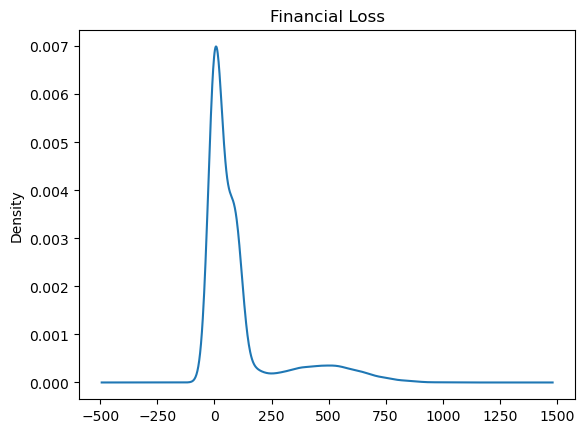

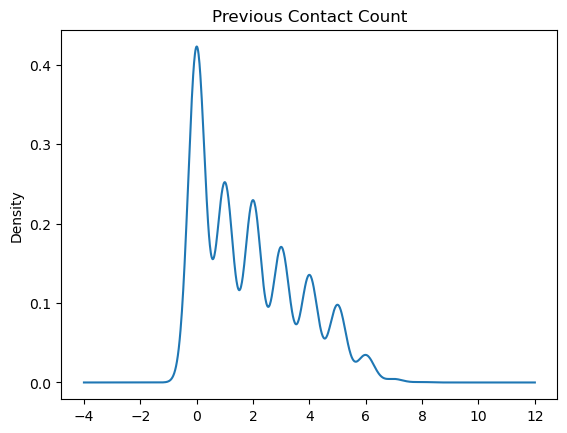

In [24]:
# plotting kernel density estimators for the numerical features
plot_num(num_cols)

- Categories are generally evenly balanced with the exception of those from Flagged by Carrier and Is International. We especially have to look for imbalance in Scam Call as it affects the accuracy of predicted values. A high imbalance would mean that a randomly selected point is very likely to be classified as the majority class and will have little different from using a model with a high accuracy.

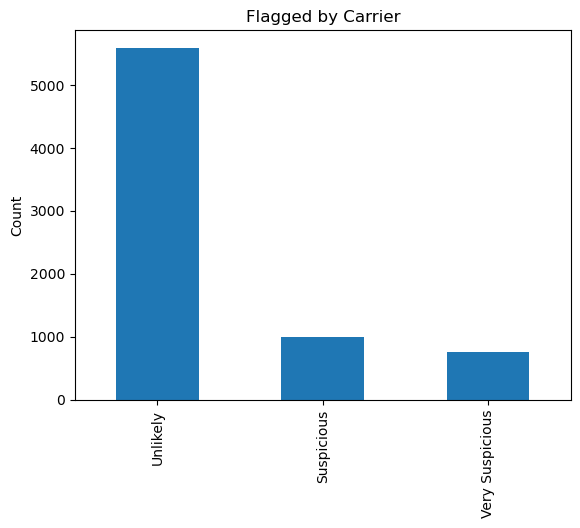

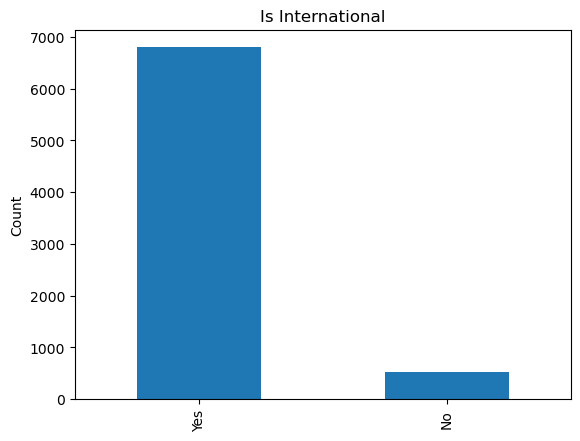

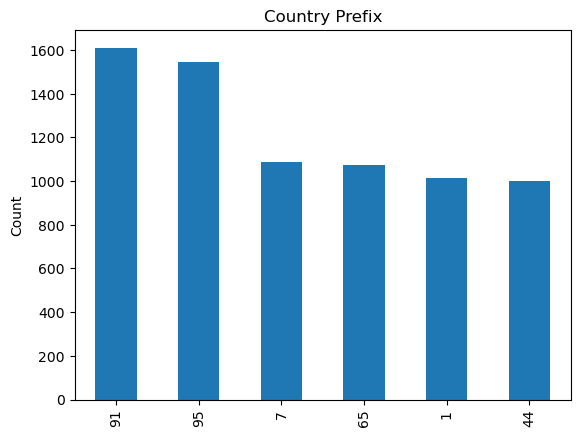

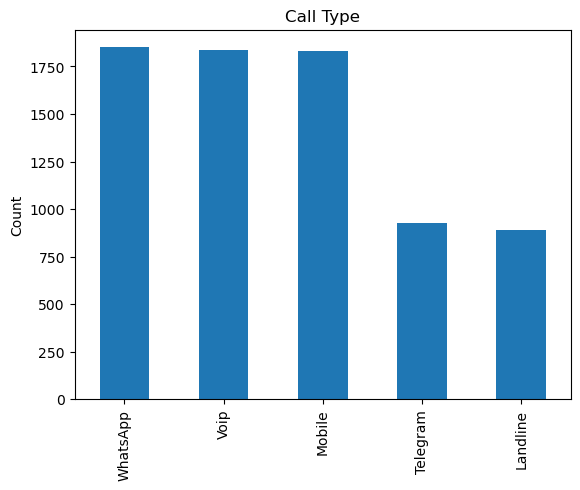

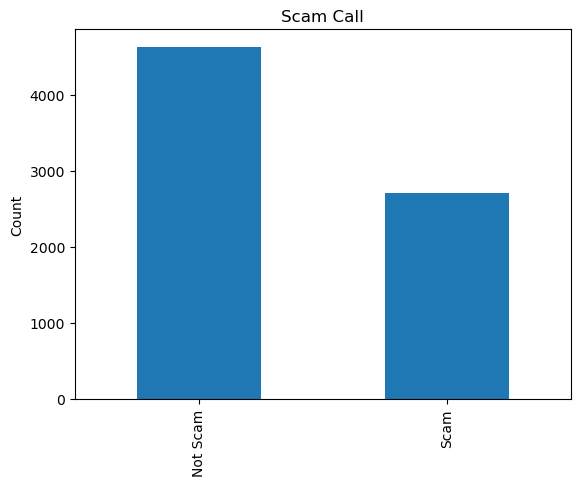

In [25]:
# plotting histograms for the categorical features
plot_cat(cat_cols)

#### Pairplot 
Pairplots enable us to observe how variables interact with one another and understand correlations and dependencies. From the pairplot with the Scam Call hue, it is clear that we are unable to perform linear classification on the dataset. Instead, we will have to consider classfication methods that involve strategies like kernel tricks and ensemble classifiers to improve classification performance.

In [26]:
def plot_pairplot(cat_cols):
    for col in cat_cols:
        pp = sns.pairplot(df, vars=num_cols, hue=col)
        pp.fig.suptitle(f'Pairplot with {col} hue', y=1.05)
        plt.show()

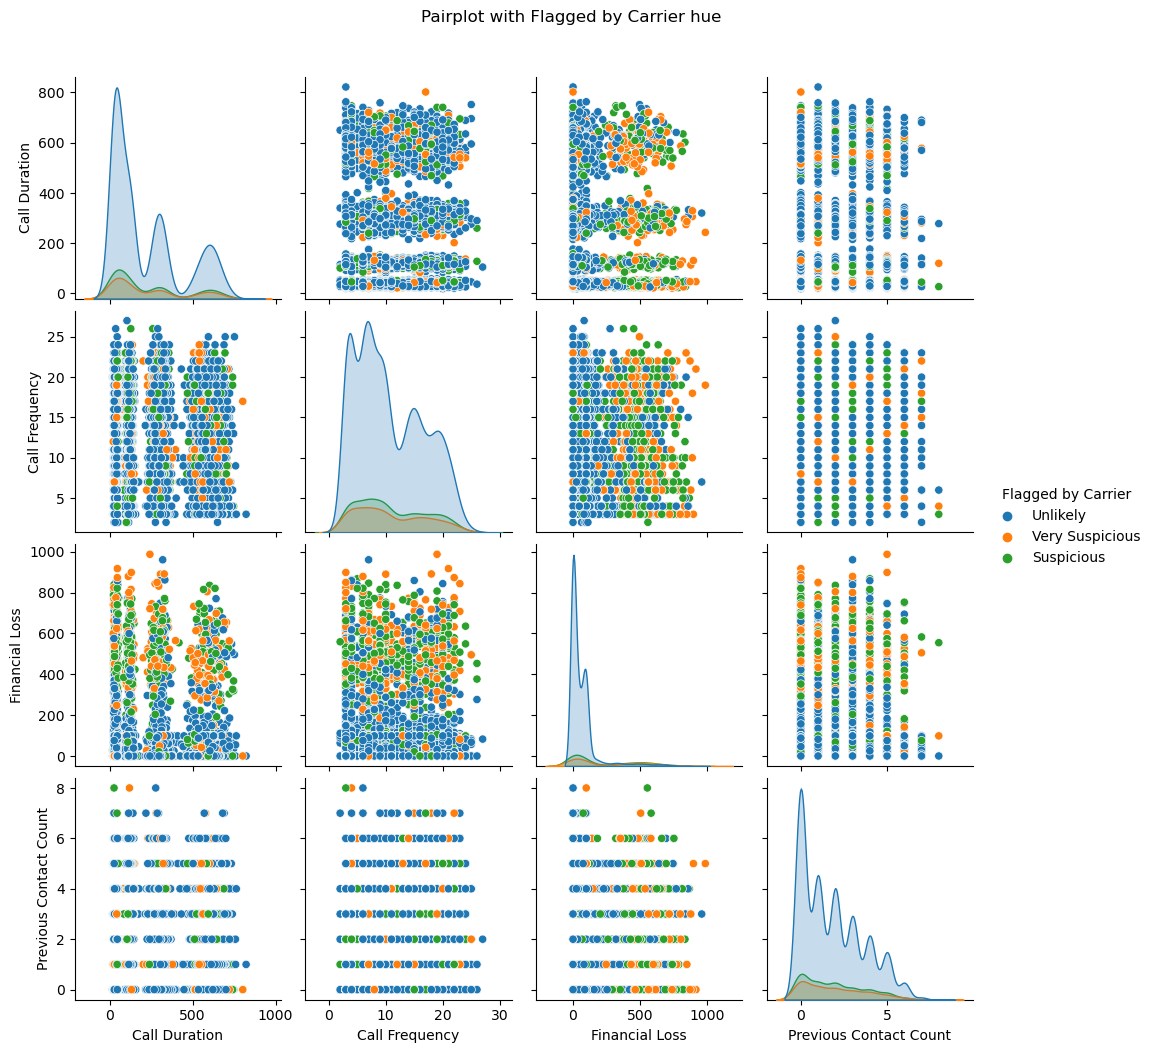

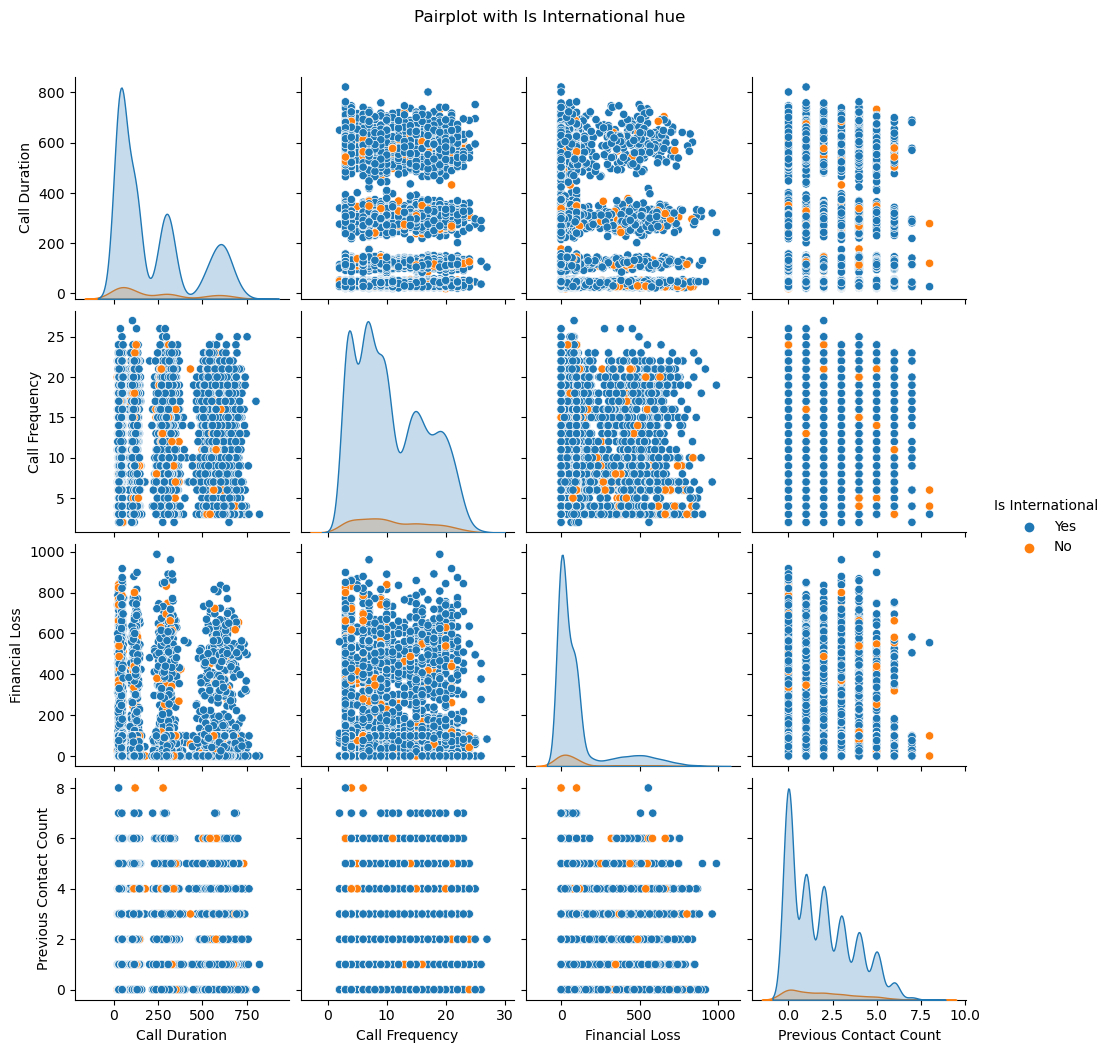

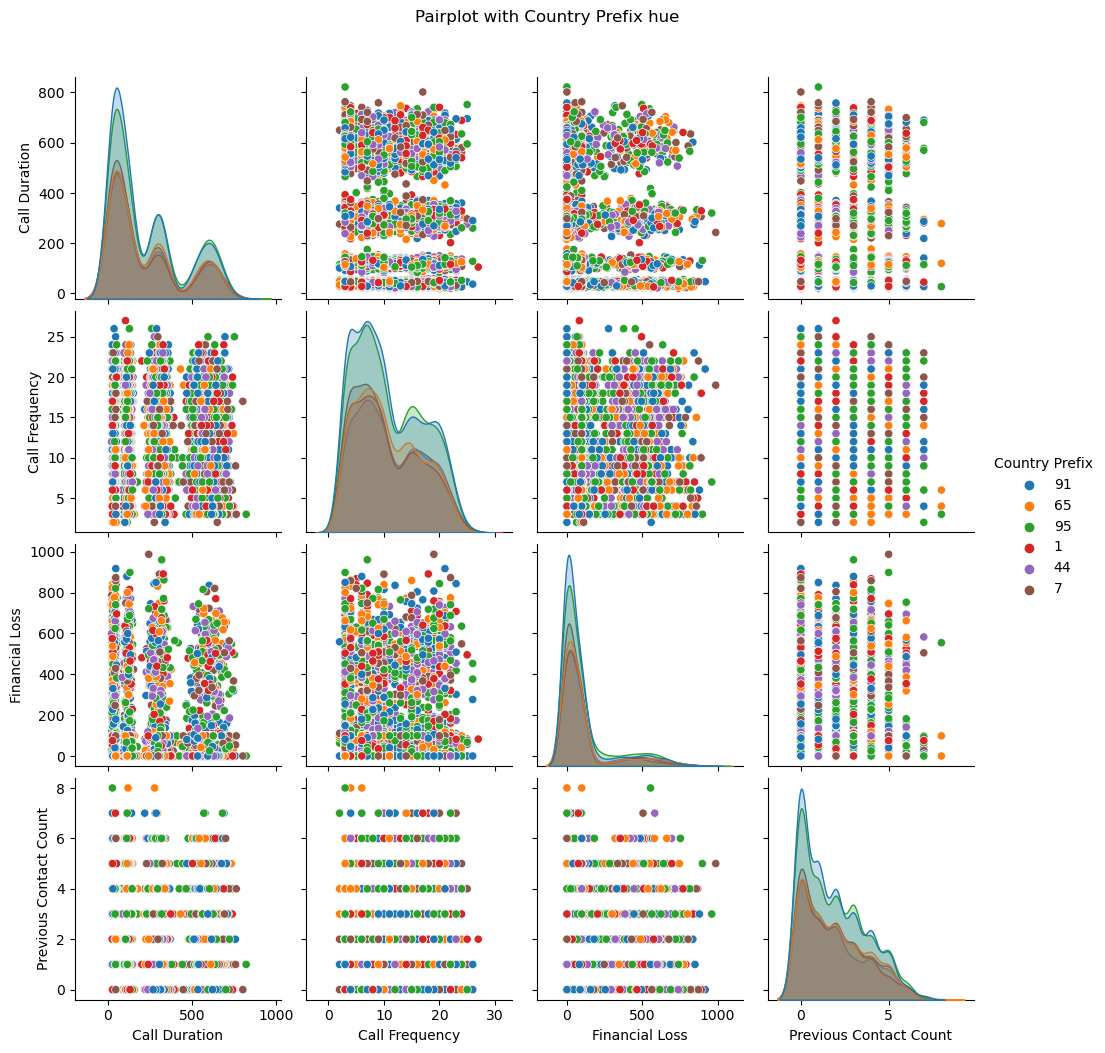

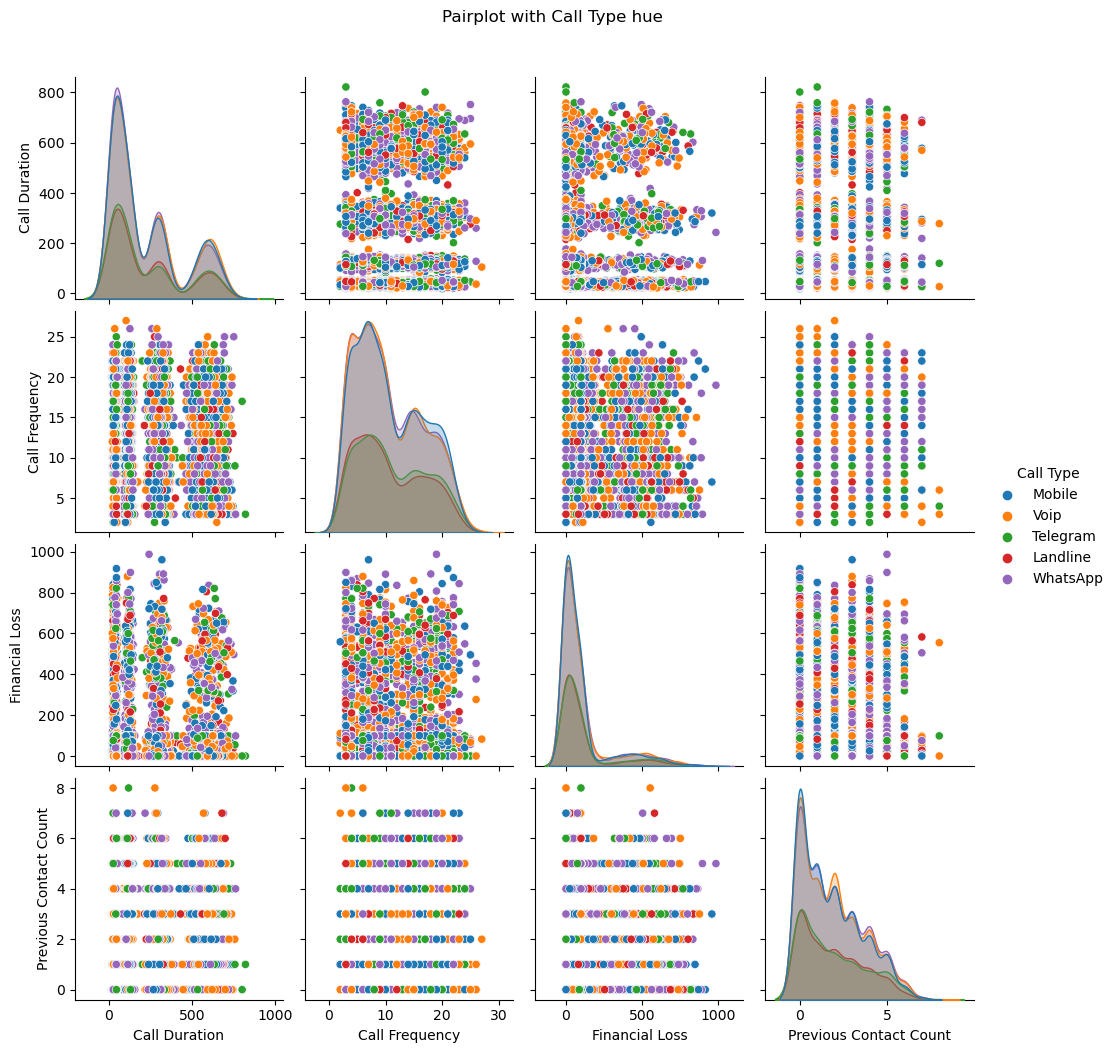

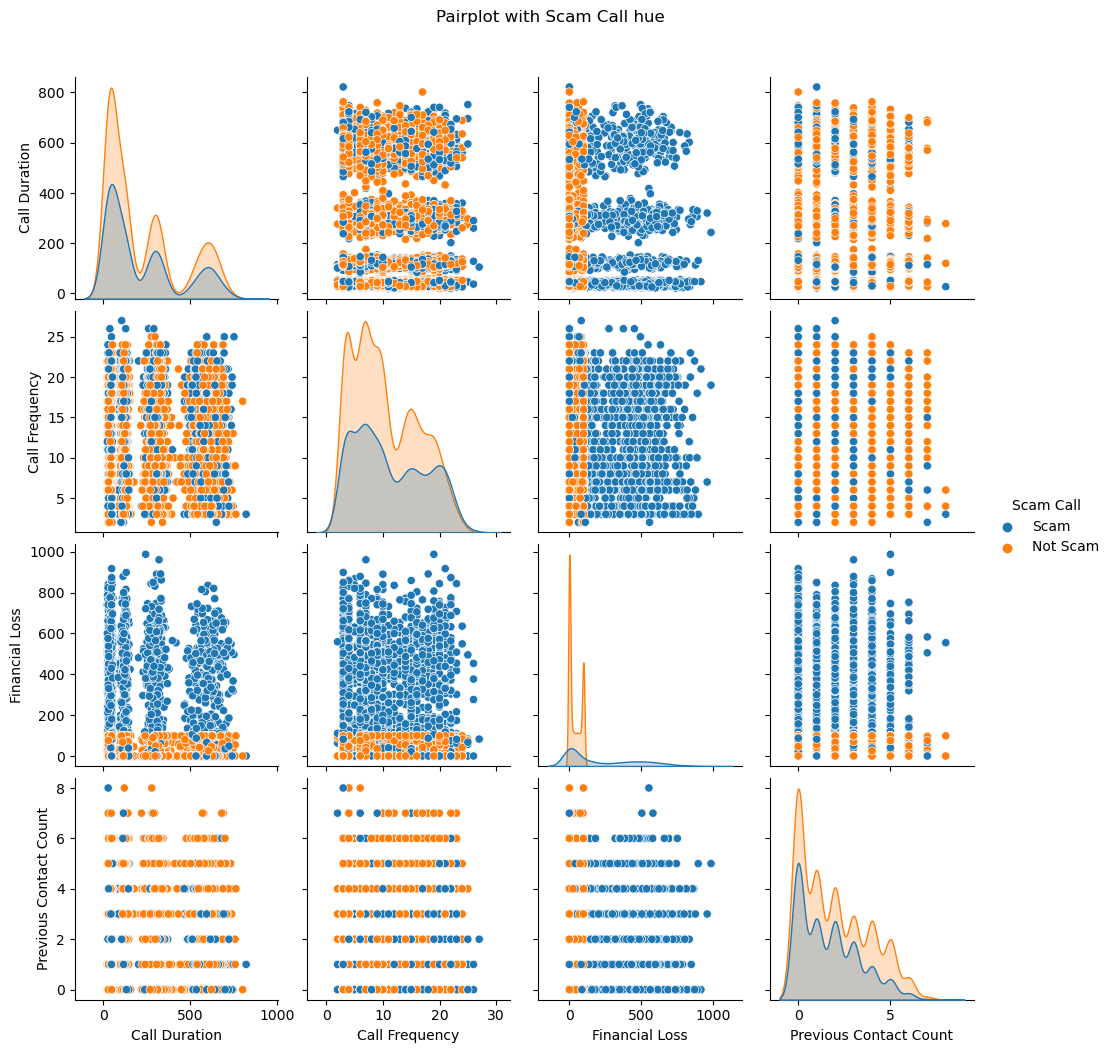

In [27]:
plot_pairplot(cat_cols)